# COMSCORE - Aprendizaje No Supervisado

El objectivo es realizar [Clustering](https://es.wikipedia.org/wiki/Algoritmo_de_agrupamiento) sobre el Dataset de los 20 medios que compiten en Comscore...<br>
... individualizarlos en clusters de caracteristicas similares.
<h5><FONT COLOR="#FF0000"> Flavio Olivier (BI)</FONT></h5>
---

### Importaciones

In [ ]:
#...
#%load_ext autoreload
#%autoreload 2

#%matplotlib inline

In [1]:
#paquetería...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy as sp
import warnings

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#...
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga del Dataset

In [4]:
#daterio...
player_df = pd.read_csv('../data/LA_VOZ_AR_comscore_2022_2023.csv', delimiter = ';', decimal = ',', encoding='latin-1')
player_df.dropna(how = 'all', inplace = True)
player_df

,orden,período,Medio,Unique Visitor (000),Views (MM),Ranking
0,1.0,mar-21,C5N.COM,NaN,NaN,1.0
1,1.0,mar-21,INFOBAE.COM,20977.360240,562.281890,2.0
2,1.0,mar-21,CLARIN.COM,16128.789539,231.735472,3.0
3,1.0,mar-21,LANACION.COM.AR (w/ history),15816.081382,198.517006,4.0
4,1.0,mar-21,TN.COM.AR (w/ history),9728.396234,74.049228,5.0
...,...,...,...,...,...,...
662,29.0,jul-23,VIAPAIS.COM.AR,3935.252888,13.195660,19.0
663,29.0,jul-23,MINUTOUNO.COM,2944.903081,19.761021,20.0
664,29.0,jul-23,CADENA3.COM,2400.840254,66.388918,21.0
665,29.0,jul-23,ELDOCE.TV,1563.188323,7.554797,22.0


In [5]:
#...
player_df[player_df.isna().any(axis = 1)]

,orden,período,Medio,Unique Visitor (000),Views (MM),Ranking
0,1.0,mar-21,C5N.COM,NaN,NaN,1.0
23,2.0,abr-21,C5N.COM,NaN,NaN,1.0
46,3.0,may-21,C5N.COM,NaN,NaN,1.0
69,4.0,jun-21,C5N.COM,NaN,NaN,1.0
92,5.0,jul-21,C5N.COM,NaN,NaN,1.0
115,6.0,ago-21,C5N.COM,NaN,NaN,1.0
138,7.0,sep-21,C5N.COM,NaN,NaN,1.0
161,8.0,oct-21,C5N.COM,NaN,NaN,1.0


In [6]:
#...
player_df.loc[player_df['Medio'] == 'C5N.COM']

,orden,período,Medio,Unique Visitor (000),Views (MM),Ranking
0,1.0,mar-21,C5N.COM,NaN,NaN,1.0
23,2.0,abr-21,C5N.COM,NaN,NaN,1.0
46,3.0,may-21,C5N.COM,NaN,NaN,1.0
69,4.0,jun-21,C5N.COM,NaN,NaN,1.0
92,5.0,jul-21,C5N.COM,NaN,NaN,1.0
115,6.0,ago-21,C5N.COM,NaN,NaN,1.0
138,7.0,sep-21,C5N.COM,NaN,NaN,1.0
161,8.0,oct-21,C5N.COM,NaN,NaN,1.0
206,9.0,nov-21,C5N.COM,916.736007,3.910857,23.0
229,10.0,dic-21,C5N.COM,1338.312172,4.578796,23.0


In [7]:
#...
media_de_Unique_Visitor = player_df.loc[player_df['Medio'] == 'C5N.COM', 'Unique Visitor (000)'].mean()
print('C5N.COM media de Unique Visitor (000):', media_de_Unique_Visitor)
media_de_Views =player_df.loc[player_df['Medio'] == 'C5N.COM', 'Views (MM)'].mean()
print('C5N.COM media de Views (MM):   ', media_de_Views)

C5N.COM media de Unique Visitor (000): 4738.840737403667
C5N.COM media de Views (MM):    20.709881987


In [8]:
#...
player_df['Unique Visitor (000)'].fillna(value = media_de_Unique_Visitor, inplace = True)
player_df['Views (MM)'].fillna(value = media_de_Views, inplace = True)

In [9]:
#...
player_df.loc[player_df['Medio'] == 'C5N.COM']

,orden,período,Medio,Unique Visitor (000),Views (MM),Ranking
0,1.0,mar-21,C5N.COM,4738.840737,20.709882,1.0
23,2.0,abr-21,C5N.COM,4738.840737,20.709882,1.0
46,3.0,may-21,C5N.COM,4738.840737,20.709882,1.0
69,4.0,jun-21,C5N.COM,4738.840737,20.709882,1.0
92,5.0,jul-21,C5N.COM,4738.840737,20.709882,1.0
115,6.0,ago-21,C5N.COM,4738.840737,20.709882,1.0
138,7.0,sep-21,C5N.COM,4738.840737,20.709882,1.0
161,8.0,oct-21,C5N.COM,4738.840737,20.709882,1.0
206,9.0,nov-21,C5N.COM,916.736007,3.910857,23.0
229,10.0,dic-21,C5N.COM,1338.312172,4.578796,23.0


In [10]:
#...
column_order = player_df['período'].drop_duplicates()
column_order

0      mar-21
23     abr-21
46     may-21
69     jun-21
92     jul-21
115    ago-21
138    sep-21
161    oct-21
184    nov-21
207    dic-21
230    ene-22
253    feb-22
276    mar-22
299    abr-22
322    may-22
345    jun-22
368    jul-22
391    ago-22
414    sep-22
437    oct-22
460    nov-22
483    dic-22
506    ene-23
529    feb-23
552    mar-23
575    abr-23
598    may-23
621    jun-23
644    jul-23
Name: período, dtype: object

In [11]:
#...
Unique_Visitor_df = player_df.pivot(index = 'Medio', columns = 'período', values = 'Unique Visitor (000)')
Unique_Visitor_df = Unique_Visitor_df.reindex(column_order, axis = 1)
Unique_Visitor_df

período,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21,nov-21,dic-21,...,oct-22,nov-22,dic-22,ene-23,feb-23,mar-23,abr-23,may-23,jun-23,jul-23
Medio,,,,,,,,,,,,,,,,,,,,,
A24.COM,4128.566816,4207.557482,4718.091148,5789.853857,4296.113852,4151.273001,4417.237166,4272.410816,4145.153591,4128.433262,...,6485.805659,7056.537937,10004.530659,8249.196592,7098.277199,8657.076189,7853.631233,9477.809972,8477.257772,7277.345174
AMBITO.COM,4386.979291,4614.343062,5060.415389,6265.037826,9280.426101,10007.373845,10914.427372,12115.649135,10164.466706,8618.439363,...,8836.263111,8089.602593,8789.814461,8450.973118,7181.952593,7465.237118,7456.806467,7494.980572,7738.711301,8409.097671
BAENEGOCIOS.COM (w/ history),3946.772610,2604.097297,2287.891965,3241.888627,2655.195524,3864.805315,5860.980283,7757.536439,8231.630327,6142.172496,...,5963.843873,6514.962383,6032.419643,5923.116739,5117.984684,6341.202397,6012.923233,5840.355269,3901.808450,4554.560752
C5N.COM,4738.840737,4738.840737,4738.840737,4738.840737,4738.840737,4738.840737,4738.840737,4738.840737,916.736007,1338.312172,...,5355.083097,7254.164066,8630.762137,8168.281934,8400.764682,8819.738330,8334.492875,7493.699560,5839.665581,6938.966681
CADENA3.COM,2636.243360,2240.453599,2328.422362,2657.614545,3472.415063,3379.135068,3181.457754,3730.686951,3643.166923,2444.848751,...,3333.045016,3784.752135,3771.253828,3863.467248,1982.572738,2650.580935,2875.406535,2239.893693,2243.859977,2400.840254
CLARIN.COM,16128.789539,16516.972668,16651.915499,17807.165396,17977.578917,19445.552782,19931.317974,21754.885852,20412.082176,17875.809888,...,18978.157628,19695.399950,20878.837889,17261.042558,15853.091841,18885.148295,16462.285711,14725.379993,14153.638417,14669.007697
CRONICA.COM.AR (w/ history),1619.604606,1496.466136,1708.137630,1838.815616,3396.026817,2823.231852,3248.007411,4896.628191,6141.958619,5041.610505,...,4998.286735,6147.061919,6932.217512,7790.355258,6348.615997,7714.584395,6332.618162,5695.984117,5030.477815,4562.114110
CRONISTA.COM (w/ history),3963.975240,5815.189771,5694.418976,4991.033923,6242.581665,10758.591659,13194.317442,12861.173914,11715.405743,11472.851664,...,12799.407253,13674.366410,13551.408910,13700.215113,13614.007806,13542.373717,13352.349329,12418.967397,11862.241369,12248.483782
DIARIOUNO.COM.AR,2336.608786,2590.039260,4476.897654,3759.763635,2690.850621,2739.535999,2180.050425,2978.187095,3359.170034,2740.637457,...,7182.233485,5906.970397,4337.601999,3371.215356,4793.872952,5067.954914,4657.974787,6035.404613,6298.471509,7650.844443


In [12]:
#StandardScaler()...
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Unique_Visitor_df.T)
scaled_df_medios = pd.DataFrame(scaled_data, index = Unique_Visitor_df.columns, columns = Unique_Visitor_df.index)
scaled_df_medios

Medio,A24.COM,AMBITO.COM,BAENEGOCIOS.COM (w/ history),C5N.COM,CADENA3.COM,CLARIN.COM,CRONICA.COM.AR (w/ history),CRONISTA.COM (w/ history),DIARIOUNO.COM.AR,ELDESTAPEWEB.COM,...,LANACION.COM.AR (w/ history),LAVOZ.COM.AR (w/ history),LOSANDES.COM.AR,MDZOL.COM (w/ history),MENDOZAPOST.COM,MINUTOUNO.COM,PAGINA12.COM.AR,PERFIL.COM,TN.COM.AR (w/ history),VIAPAIS.COM.AR
período,,,,,,,,,,,,,,,,,,,,,
mar-21,-1.207060,-2.131129,-0.915113,0.000000,-0.255749,-0.820517,-1.909128,-2.522284,-1.429273,-2.265147,...,-1.422437,-1.289597,-1.076460,-0.574790,1.753745,-1.958658,0.721560,0.052016,-1.470174,-1.316485
abr-21,-1.161153,-1.994099,-1.735216,0.000000,-0.921596,-0.609254,-1.974246,-1.869636,-1.255851,-1.550571,...,-0.122976,-1.019976,-1.049203,-1.525018,2.578094,-0.669730,1.657876,0.042017,-1.454971,-1.817439
may-21,-0.864441,-1.725256,-1.928353,0.000000,-0.773604,-0.535814,-1.862311,-1.912214,0.035327,-2.118981,...,0.502749,0.328831,-0.959012,-1.572959,0.334868,-0.001195,1.845262,0.432244,-1.672322,-1.944549
jun-21,-0.241554,-0.999242,-1.345654,0.000000,-0.219796,0.092913,-1.793206,-2.160194,-0.455408,-1.712671,...,0.507294,0.308029,-1.612603,-0.186546,0.715309,0.576321,0.705759,0.415837,-1.613656,-1.464053
jul-21,-1.109685,0.818102,-1.704005,0.000000,1.150964,0.185658,-0.969731,-1.718959,-1.186865,-1.307828,...,0.677755,0.000853,-0.055939,-0.104962,0.077138,-0.998093,0.107156,1.026218,-1.526526,-0.727933
ago-21,-1.193864,1.256226,-0.965179,0.000000,0.994036,0.984579,-1.272633,-0.126834,-1.153550,-0.914932,...,2.059250,1.600620,-0.397495,-0.323887,0.416941,-0.816577,0.890234,1.007873,-1.207870,-0.847859
sep-21,-1.039291,1.802898,0.254080,0.000000,0.661479,1.248949,-1.048006,0.731884,-1.536406,0.641101,...,1.672192,1.883894,1.579960,-0.118178,-0.126710,-0.185807,2.451842,0.835837,-0.891829,-0.532358
oct-21,-1.123461,2.526862,1.412492,0.000000,1.585461,2.241397,-0.176192,0.614434,-0.990241,-0.004029,...,2.123603,1.803613,0.448564,-0.030963,-0.077831,0.083250,1.324161,0.708670,-0.619363,-0.305718
nov-21,-1.197420,1.350904,1.702067,-1.603411,1.438224,1.510598,0.482356,0.210492,-0.729534,1.382978,...,1.434024,0.963533,1.465829,-0.110861,0.244115,-0.386116,1.776680,1.129733,0.154268,-0.172392


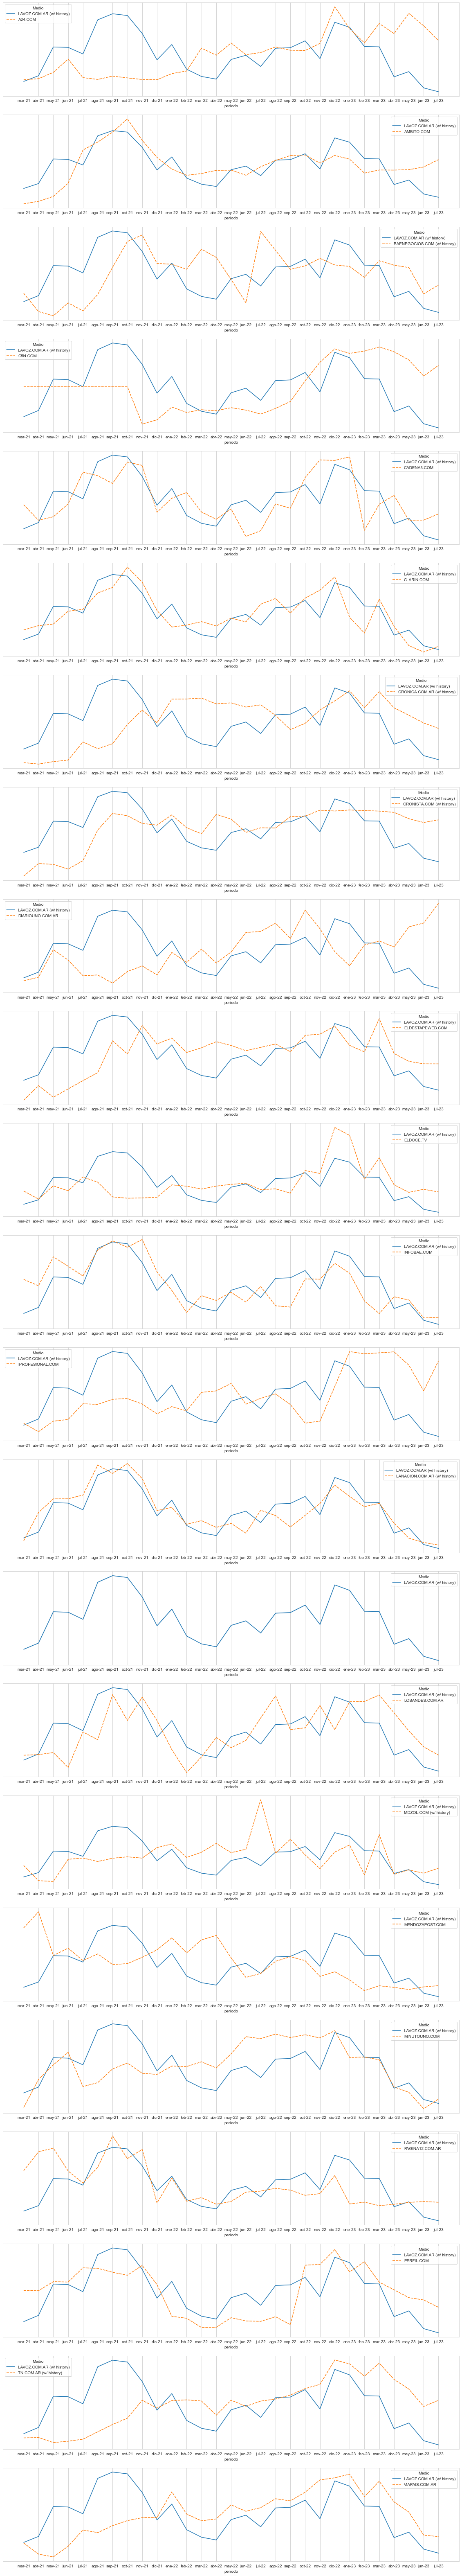

In [13]:
#...
cuantos = len(scaled_df_medios.columns)
fig, ax = plt.subplots(cuantos, figsize = (20, (cuantos * 5)))

g = [None] * cuantos

for i in range(cuantos):
    g[i] = sns.lineplot(data = scaled_df_medios[['LAVOZ.COM.AR (w/ history)', scaled_df_medios.columns[i]]], ax = ax[i])
    g[i].set(yticks = [])

plt.show()

---

> ### Aplicar Clustering sobre las features

Usar [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para el clustering.

In [14]:
#StandardScaler()...
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Unique_Visitor_df.T)
scaled_df_fechas = pd.DataFrame(scaled_data.T, index = Unique_Visitor_df.index, columns = column_order)
scaled_df_fechas

período,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21,nov-21,dic-21,...,oct-22,nov-22,dic-22,ene-23,feb-23,mar-23,abr-23,may-23,jun-23,jul-23
Medio,,,,,,,,,,,,,,,,,,,,,
A24.COM,-1.207060,-1.161153,-0.864441,-0.241554,-1.109685,-1.193864,-1.039291,-1.123461,-1.197420,-1.207138,...,0.162918,0.494616,2.207929,1.187765,0.518874,1.424816,0.957870,1.901810,1.320309,0.622945
AMBITO.COM,-2.131129,-1.994099,-1.725256,-0.999242,0.818102,1.256226,1.802898,2.526862,1.350904,0.419129,...,0.550409,0.100404,0.522415,0.318199,-0.446627,-0.275894,-0.280975,-0.257968,-0.111074,0.292961
BAENEGOCIOS.COM (w/ history),-0.915113,-1.735216,-1.928353,-1.345654,-1.704005,-0.965179,0.254080,1.412492,1.702067,0.425832,...,0.316909,0.653531,0.358795,0.292033,-0.199740,0.547399,0.346887,0.241482,-0.942577,-0.543878
C5N.COM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.603411,-1.426555,...,0.258520,1.055203,1.632700,1.438685,1.536213,1.711977,1.508412,1.155691,0.461807,0.922975
CADENA3.COM,-0.255749,-0.921596,-0.773604,-0.219796,1.150964,0.994036,0.661479,1.585461,1.438224,-0.577737,...,0.916498,1.676416,1.653708,1.808841,-1.355436,-0.231629,0.146601,-0.922538,-0.915865,-0.651774
CLARIN.COM,-0.820517,-0.609254,-0.535814,0.092913,0.185658,0.984579,1.248949,2.241397,1.510598,0.130271,...,0.730207,1.120555,1.764622,-0.204306,-0.970561,0.679588,-0.639017,-1.584300,-1.895462,-1.614980
CRONICA.COM.AR (w/ history),-1.909128,-1.974246,-1.862311,-1.793206,-0.969731,-1.272633,-1.048006,-0.176192,0.482356,-0.099523,...,-0.122434,0.485055,0.900256,1.354052,0.591640,1.313983,0.583180,0.246519,-0.105410,-0.353088
CRONISTA.COM (w/ history),-2.522284,-1.869636,-1.912214,-2.160194,-1.718959,-0.126834,0.731884,0.614434,0.210492,0.124979,...,0.592658,0.901126,0.857777,0.910239,0.879847,0.854592,0.787599,0.458534,0.262259,0.398430
DIARIOUNO.COM.AR,-1.429273,-1.255851,0.035327,-0.455408,-1.186865,-1.153550,-1.536406,-0.990241,-0.729534,-1.152796,...,1.886588,1.013926,-0.059993,-0.721292,0.252233,0.439787,0.159238,1.101813,1.281830,2.207259


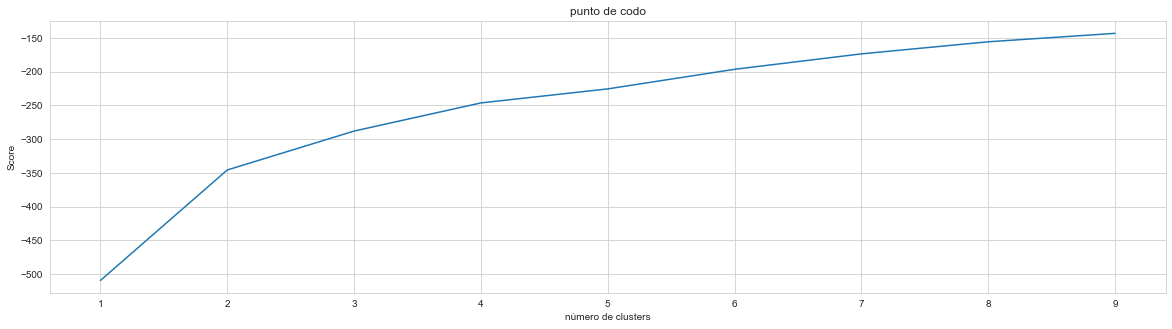

In [15]:
#...
fig, ax = plt.subplots(figsize = (20, 5))

Nc = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score = [kmeans[i].fit(scaled_df_fechas).score(scaled_df_fechas) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('número de clusters')
plt.ylabel('Score')
plt.title('punto de codo')
plt.show()

> ### Uso de Embedding

Aplicar el uso de embeddings, por ejemplo [PCA](https://es.wikipedia.org/wiki/PCA), para comparar que sucede en ese espacio en comparacion con lo que sucede en el espacio original.

In [16]:
#embedding sobre data total...
from sklearn.preprocessing import StandardScaler

#PCA...
pca = PCA(n_components = 2)
PrincipalComponents = pca.fit_transform(scaled_df_fechas)

#display(pd.DataFrame(PrincipalComponents, columns = ['PC_1', 'PC_2']))

#varianzas explicadas...
print('% Varianza explicada de cada componente:', pca.explained_variance_ratio_)
print('% Varianza explicada total:', sum(pca.explained_variance_ratio_))
print()

% Varianza explicada de cada componente: [0.38298998 0.16995973]
% Varianza explicada total: 0.5529497103922564



### Aplicamos silhouette sobre el embedding del subset y observamos...

Para n_clusters = 2 El silhouette_score promedio es : 0.485869311987718
Para n_clusters = 3 El silhouette_score promedio es : 0.44172838662744757
Para n_clusters = 4 El silhouette_score promedio es : 0.4035727486703548
Para n_clusters = 5 El silhouette_score promedio es : 0.34758169036515346
Para n_clusters = 6 El silhouette_score promedio es : 0.3625356397709317
Para n_clusters = 7 El silhouette_score promedio es : 0.379898577554214
Para n_clusters = 8 El silhouette_score promedio es : 0.3621406863181288


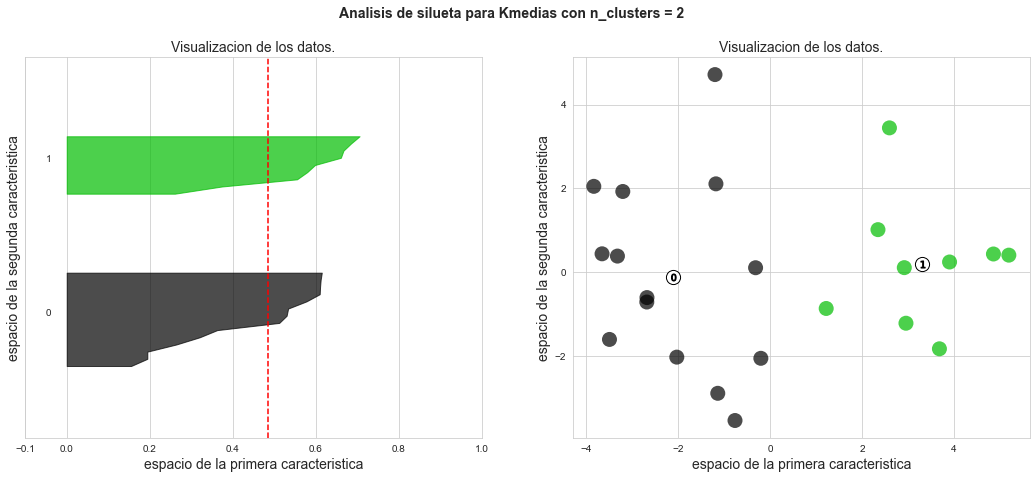

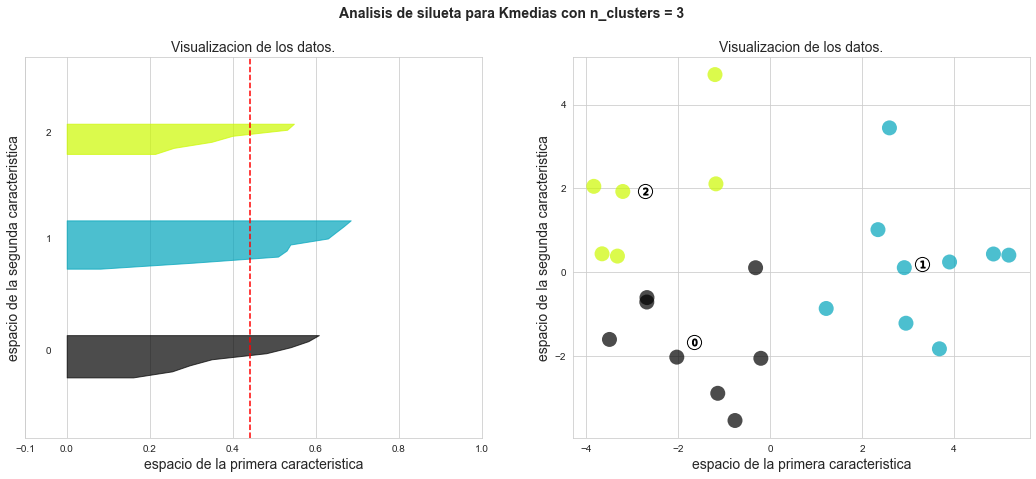

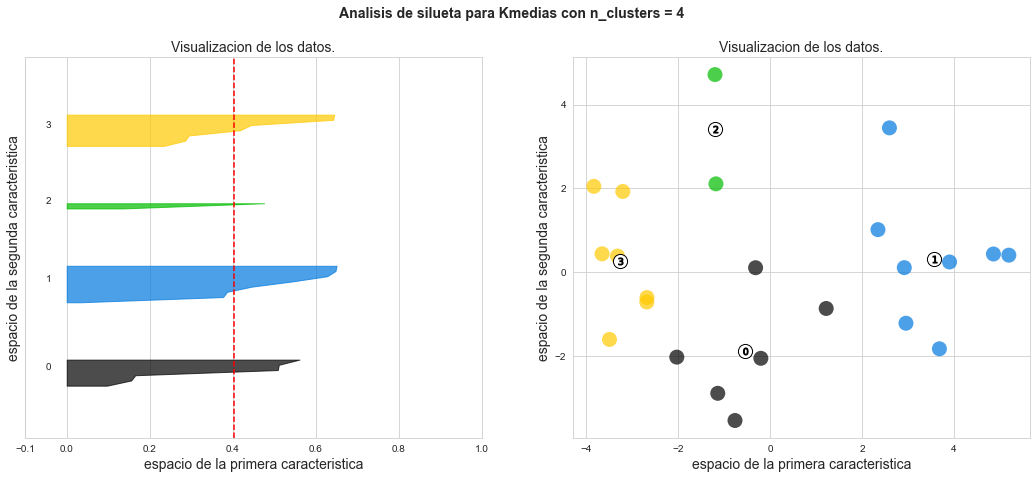

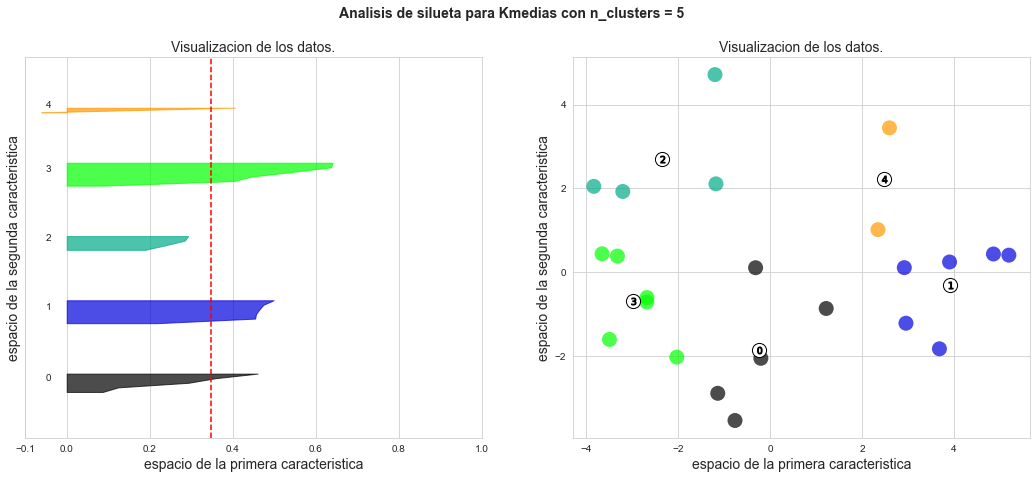

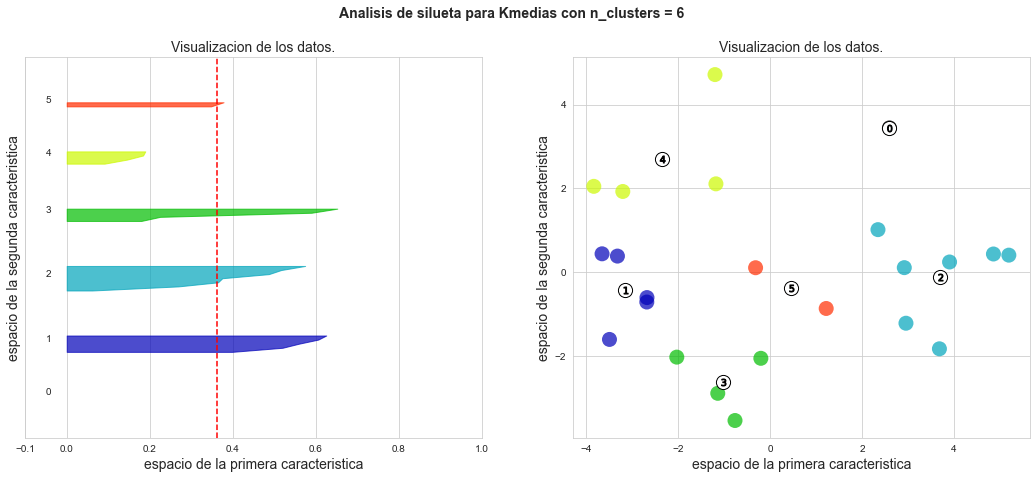

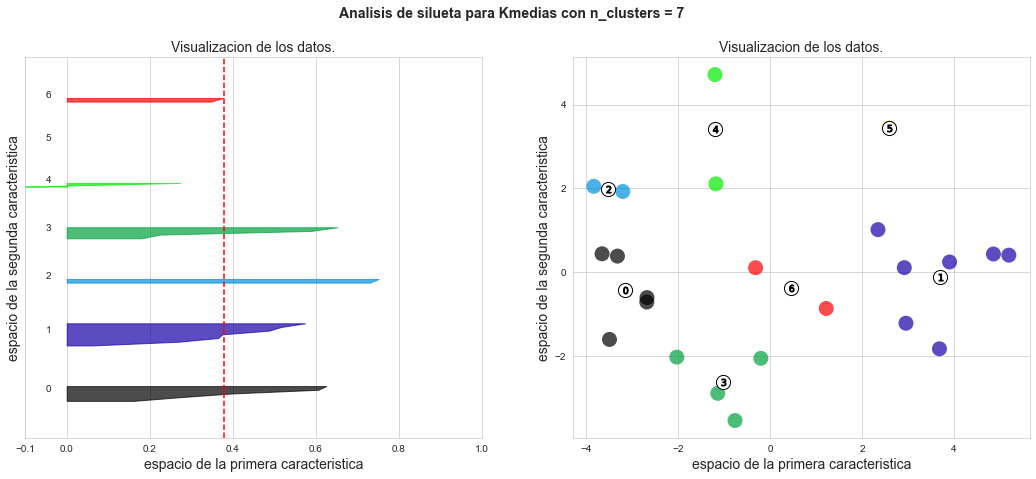

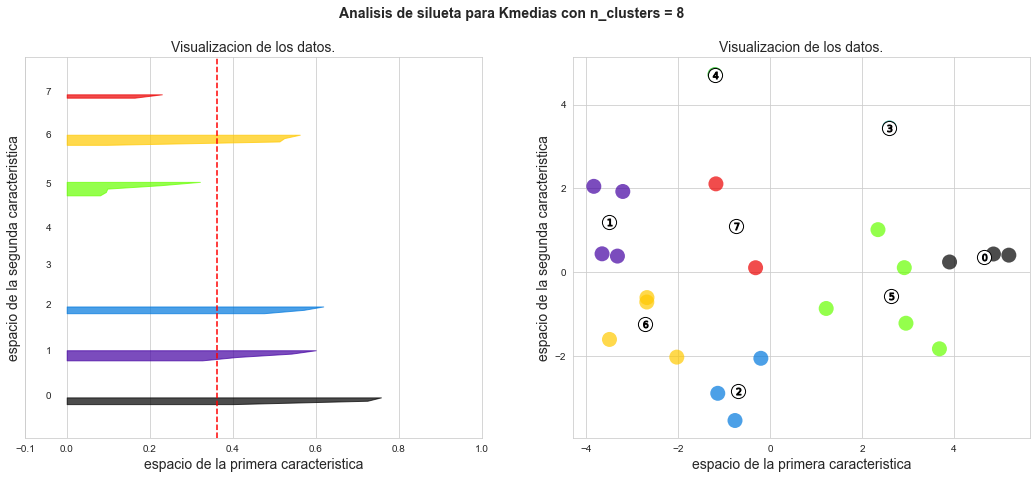

In [17]:
#solhouuette sobre el embedding del subset...
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = PrincipalComponents.copy()
range_n_clusters = 9
sse = {}
for n_clusters in range(2, range_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('Para n_clusters =', n_clusters, 'El silhouette_score promedio es :', silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('Visualizacion de los datos.', fontsize = 14)
    ax1.set_xlabel('espacio de la primera caracteristica', fontsize = 14)
    ax1.set_ylabel('espacio de la segunda caracteristica', fontsize = 14)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = 'red', linestyle = '--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 900, lw  =0, alpha = 0.7,
                c = colors, edgecolor = 'k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = 'white', alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title('Visualizacion de los datos.', fontsize = 14)
    ax2.set_xlabel('espacio de la primera caracteristica', fontsize = 14)
    ax2.set_ylabel('espacio de la segunda caracteristica', fontsize = 14)

    plt.suptitle(('Analisis de silueta para Kmedias '
                  'con n_clusters = %d' % n_clusters),
                 fontsize = 14, fontweight = 'bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()


In [18]:
#...
km_pred = KMeans(n_clusters = 4, random_state = 42).fit_predict(scaled_df_fechas)
km_pred

array([1, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 3, 2, 0, 0, 2,
       2])

In [19]:
#resultó algo así...
result_df = pd.DataFrame(km_pred, columns = ['cluster'], index = scaled_df_fechas.index).sort_values(by = ['cluster'])
result_df

,cluster
Medio,
INFOBAE.COM,0
AMBITO.COM,0
PERFIL.COM,0
PAGINA12.COM.AR,0
CADENA3.COM,0
CLARIN.COM,0
LAVOZ.COM.AR (w/ history),0
LANACION.COM.AR (w/ history),0
IPROFESIONAL.COM,1


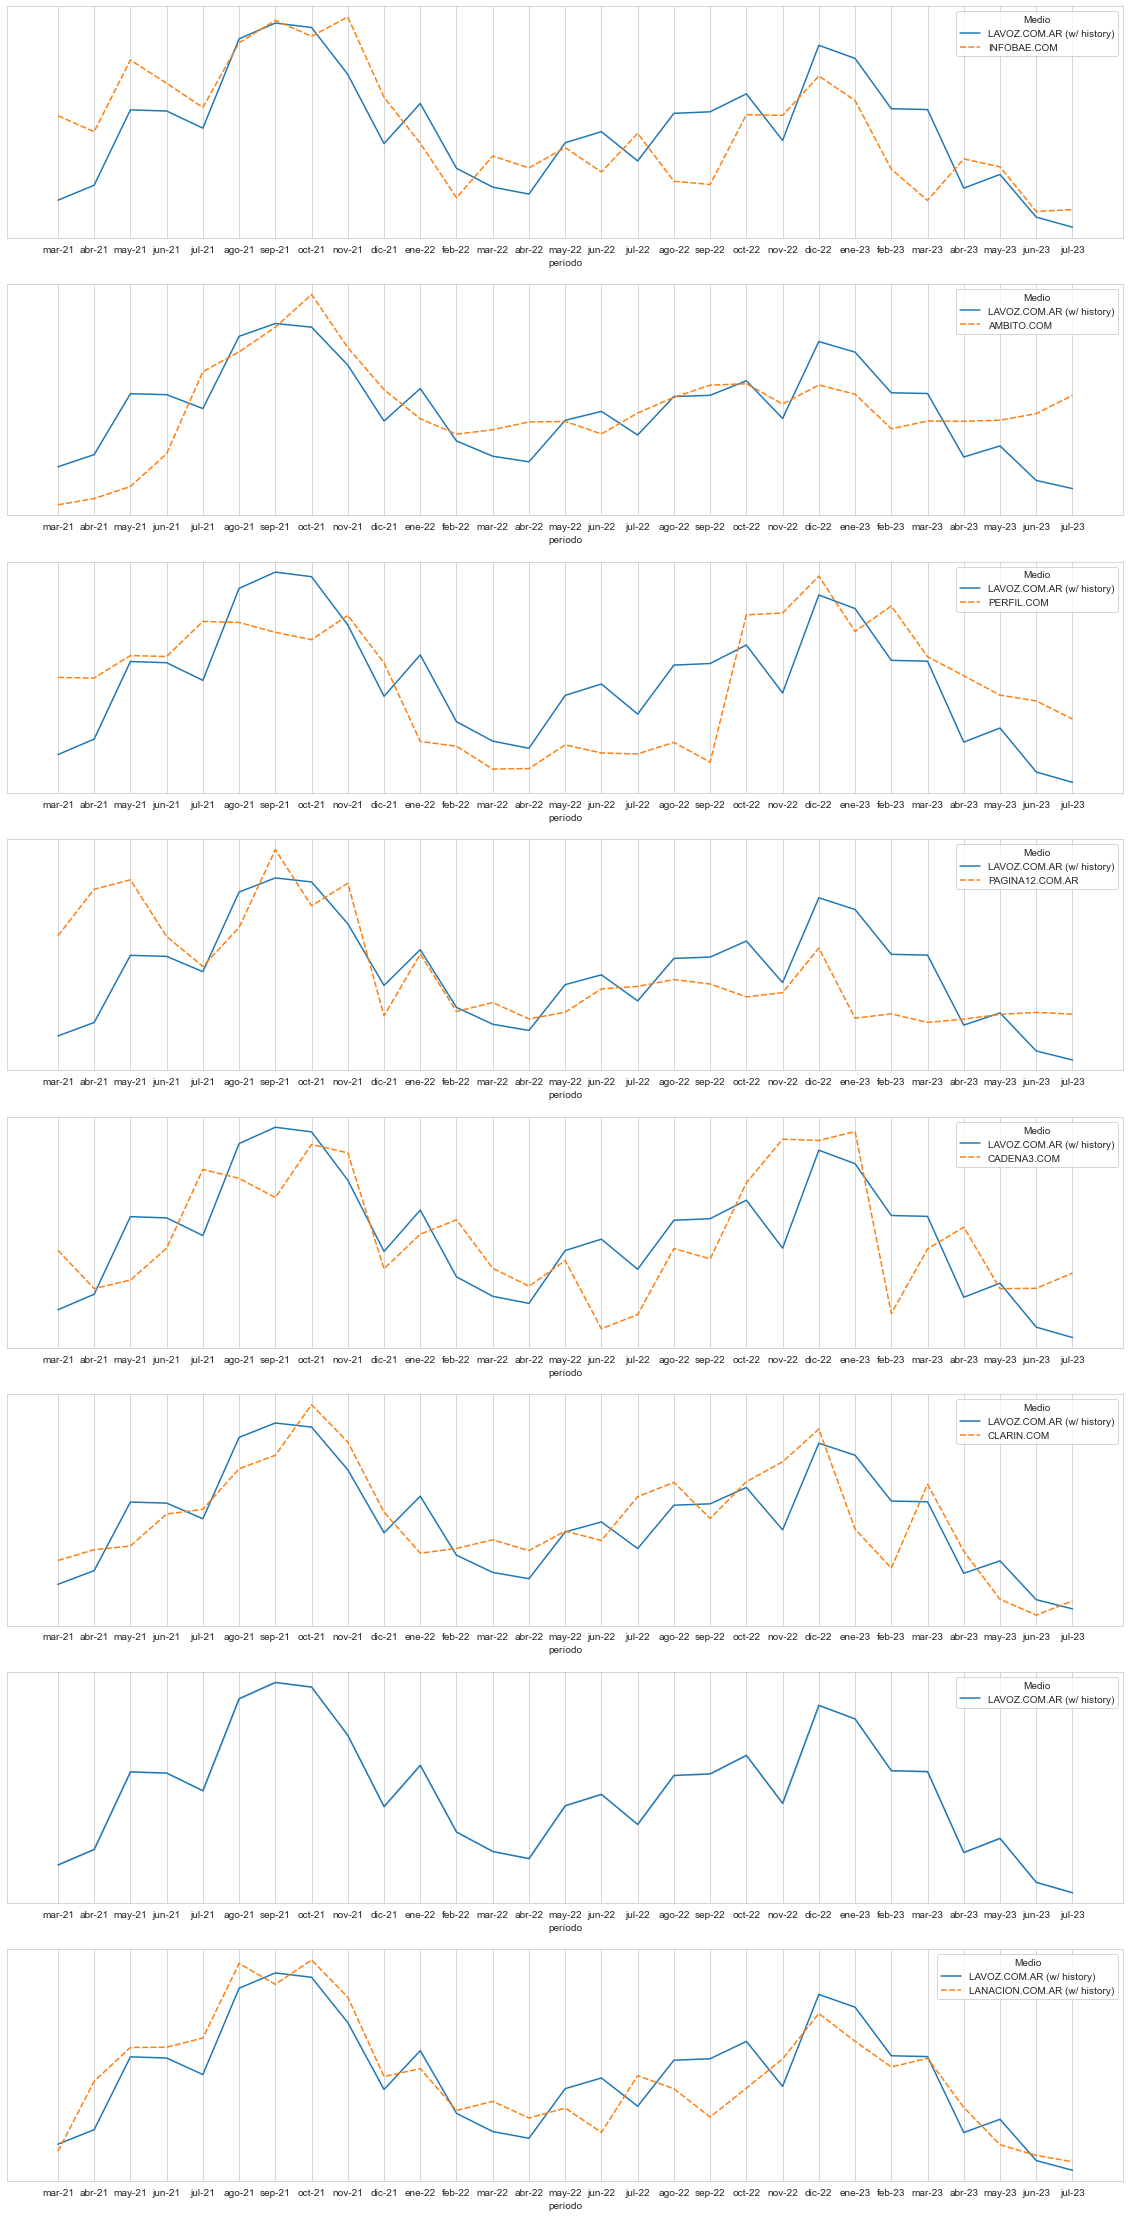

In [20]:
#...
cluster_0 = result_df.loc[result_df['cluster'] == 0].index
scaled_df_medios_XS = scaled_df_medios[cluster_0]

cuantos = len(cluster_0)
fig, ax = plt.subplots(cuantos, figsize = (20, (cuantos * 5)))

g = [None] * cuantos

for i in range(cuantos):
    g[i] = sns.lineplot(data = scaled_df_medios_XS[['LAVOZ.COM.AR (w/ history)', scaled_df_medios_XS.columns[i]]], ax = ax[i])
    g[i].set(yticks = [])

plt.show()

Index(['INFOBAE.COM', 'AMBITO.COM', 'PERFIL.COM', 'PAGINA12.COM.AR',
       'CADENA3.COM', 'CLARIN.COM', 'LAVOZ.COM.AR (w/ history)',
       'LANACION.COM.AR (w/ history)'],
      dtype='object', name='Medio')


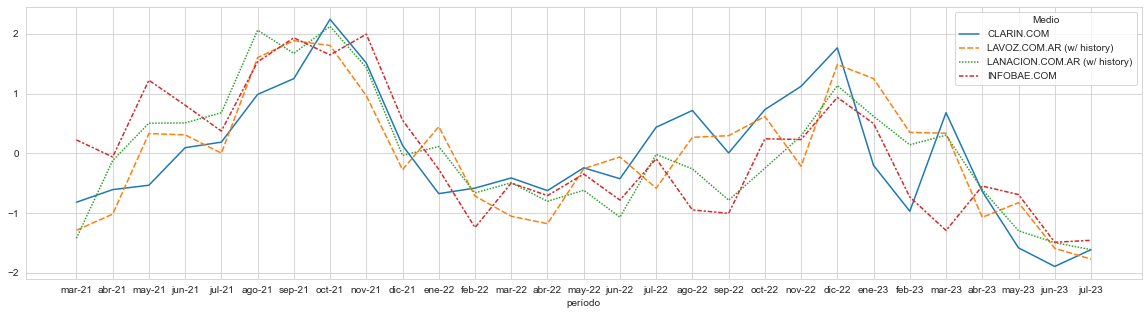

In [31]:
#...
cluster_0 = result_df.loc[result_df['cluster'] == 0].index
print(cluster_0)
cluster_0_df = scaled_df_medios[['CLARIN.COM', 'LAVOZ.COM.AR (w/ history)', 'LANACION.COM.AR (w/ history)', 'INFOBAE.COM']]

#...
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = cluster_0_df)

plt.show()

Index(['IPROFESIONAL.COM', 'ELDOCE.TV', 'A24.COM', 'DIARIOUNO.COM.AR',
       'C5N.COM'],
      dtype='object', name='Medio')


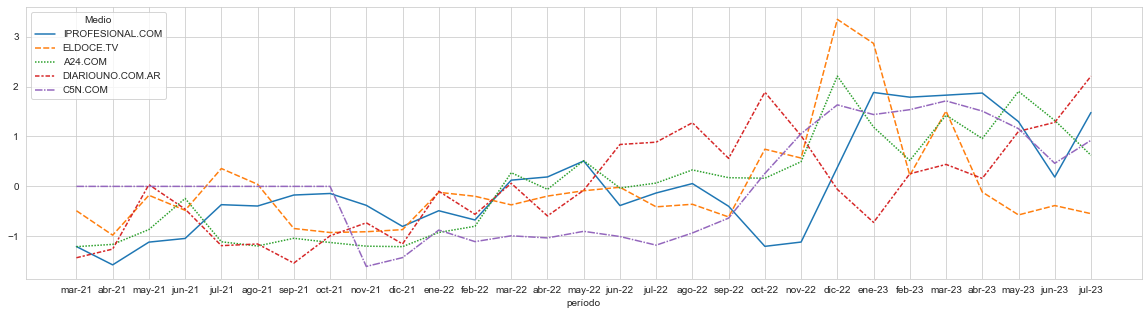

In [30]:
#...
cluster_1 = result_df.loc[result_df['cluster'] == 1].index
print(cluster_1)
cluster_1_df = scaled_df_medios[cluster_1]

#...
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = cluster_1_df)

plt.show()

Index(['TN.COM.AR (w/ history)', 'CRONISTA.COM (w/ history)',
       'CRONICA.COM.AR (w/ history)', 'LOSANDES.COM.AR',
       'MDZOL.COM (w/ history)', 'MINUTOUNO.COM',
       'BAENEGOCIOS.COM (w/ history)', 'ELDESTAPEWEB.COM', 'VIAPAIS.COM.AR'],
      dtype='object', name='Medio')


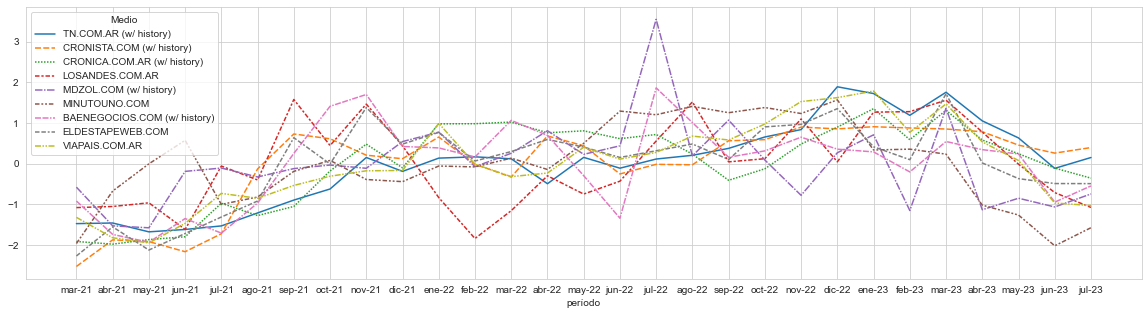

In [32]:
#...
cluster_2 = result_df.loc[result_df['cluster'] == 2].index
print(cluster_2)
cluster_2_df = scaled_df_medios[cluster_2]

#...
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(data = cluster_2_df)

plt.show()